In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, auc


# Car Evaluation

In [ ]:
#Renaming the header column names

columnName  = ["buying", "maintenance", "doors", "persons", "luggage_boot", "safety", "class"]

#Opening the dataset as csv and assigning the labels to the columns
df = pd.read_csv("car.data", names=columnName)

#Changing the data to numbers
#le = preprocessing.LabelEncoder()
#df = df.apply(le.fit_transform)

df.head()

In [ ]:
#Converting our classes into numbers so that the computer understands - ['unacc', 'acc', 'vgood', 'good']
cMappings = {"unacc": 0, "acc": 1, "vgood": 2, "good": 3}
df['class'] = df['class'].replace(cMappings)

In [ ]:
df.head()

#Train, validation, test datasets


In [ ]:
#np.split - splitting the dataset
#60%        : training data
#60 - 80%   : validating data
#80 - 100%  : testing data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
#Scaling the dataset - Normalizing the features (standardizing)
def scaleDataset(dataframe):
    # x - all columns except the last one
    # y - last column
    x = dataframe[dataframe.columns[:-1]]
    y = dataframe[dataframe.columns[-1]]

    # One-hot encode categorical columns - Converting it to binary for the computer to understand
    categoricalColumn = ['buying', 'maintenance', 'doors', 'persons', 'luggage_boot', 'safety']
    x = pd.get_dummies(x, columns=categoricalColumn)

    # Convert y to numeric using class mapping and replacing the y's
    class_mapping = {"unacc": 0, "acc": 1, "vgood": 2, "good": 3}
    y = y.replace(class_mapping)

    scaler = StandardScaler()
    # Fitting x, transforming all the values and converting x to numpy array using .values
    x = scaler.fit_transform(x.values)

    # Stacking the array side by side and convert y to numpy array using .values
    data = np.hstack((x, np.reshape(y.values, (-1, 1))))

    return data, x, y

In [ ]:
train, x_train, y_train = scaleDataset(train)
valid, x_valid, y_valid = scaleDataset(valid)
test, x_test, y_test = scaleDataset(test)

In [ ]:
#Checking the number of classes

print(len(train[train["class"]==0]))
print(len(train[train["class"]==1]))
print(len(train[train["class"]==2]))
print(len(train[train["class"]==3]))

753
216
36
31


# Notes

*   If a model avoids a lot of mistakes in predicting bananas as apples - **precision**
*   If a model avoids a lot of mistakes in predicting apples as bananas - **recall**

*   **f1-score** takes into consideration both precision and recall


# kNN Model



In [ ]:
# Setting the neighbors parameter - weights
knn_model = KNeighborsClassifier(n_neighbors = 8)
#Fitting all the model
knn_model.fit(x_train, y_train)

In [ ]:
#Getting all the predictions
y_prediction = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       231
           1       0.77      0.77      0.77        79
           2       0.90      0.56      0.69        16
           3       0.83      0.25      0.38        20

    accuracy                           0.87       346
   macro avg       0.85      0.64      0.70       346
weighted avg       0.87      0.87      0.86       346



# ROC Curve

AUC for k-Nearest Neighbors (kNN): 0.9635084309394178


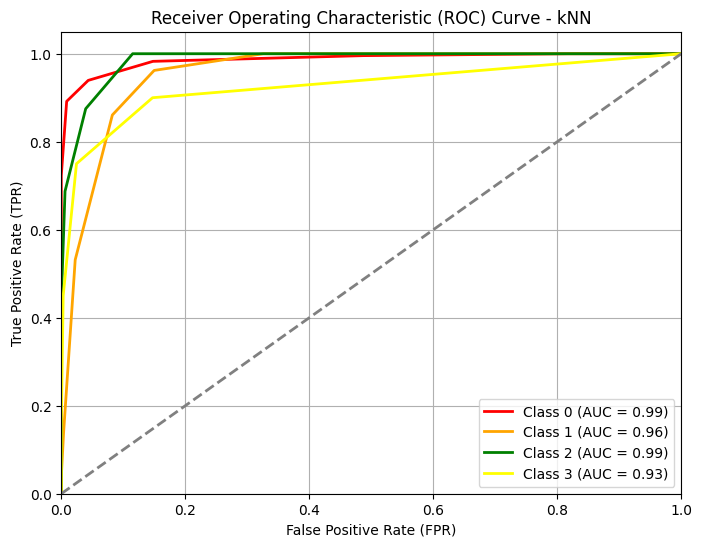

In [ ]:
# Plot ROC curve for kNN
y_probabilities = knn_model.predict_proba(x_test)
roc_auc_knn = roc_auc_score(y_test, y_probabilities, multi_class='ovr')

print("AUC for k-Nearest Neighbors (kNN):", roc_auc_knn)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):  # Assuming 4 classes (0, 1, 2, 3)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
colors = ['red', 'orange', 'green', 'yellow']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - kNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#For calculating the AUC and ROC
svm_model = SVC(probability = True)
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_prediction = svm_model.predict(x_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       231
           1       0.88      0.99      0.93        79
           2       0.82      0.88      0.85        16
           3       0.93      0.70      0.80        20

    accuracy                           0.95       346
   macro avg       0.91      0.88      0.89       346
weighted avg       0.96      0.95      0.95       346



# ROC Curve for SVM

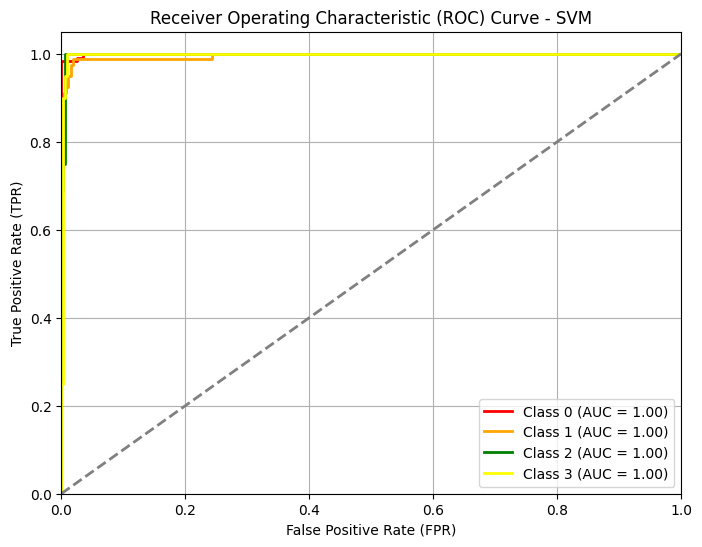

AUC for SVM: 0.9977207795074755


In [ ]:
y_probabilities = svm_model.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):  # Assuming 4 classes (0, 1, 2, 3)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
colors = ['red', 'orange', 'green', 'yellow']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

roc_auc_svm = roc_auc_score(y_test, y_probabilities, multi_class='ovr')
print("AUC for SVM:", roc_auc_svm)





# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

In [ ]:
y_prediction = rf_model.predict(x_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       231
           1       0.81      0.97      0.89        79
           2       0.77      0.62      0.69        16
           3       0.77      0.50      0.61        20

    accuracy                           0.93       346
   macro avg       0.84      0.77      0.79       346
weighted avg       0.93      0.93      0.92       346



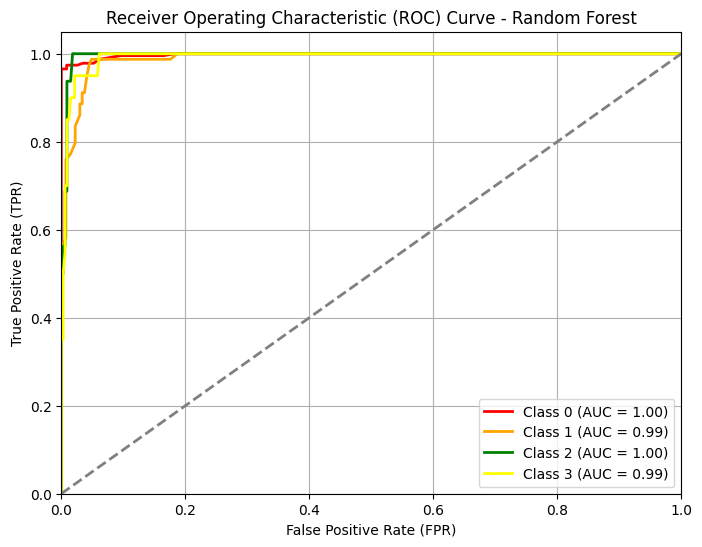

ROC AUC score for Random Forest: 0.9937998332506554


In [ ]:
y_probabilities = rf_model.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):  # Assuming 4 classes (0, 1, 2, 3)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(8, 6))
colors = ['red', 'orange', 'green', 'yellow']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


roc_auc_rf = roc_auc_score(y_test, y_probabilities, multi_class='ovr')

print("ROC AUC score for Random Forest:", roc_auc_rf)